In [89]:
#### 1.주식,코인 데이터를 가지고 데이터의 개수 1000개를 선택
#### 2.데이터를 csv로 변환
#### 3.csv를 DB에 삽입
#### 4.mysql query문으로 데이터를 받아와서(모듈로 생성해서 Class로 구현)
#### 5.주가의 기준-> 시가,종가,고가,저가 소수점 2번째 자리까지 유지 셋째자리에서 반올림
#### 6.코인을 기준으로 할거면 볼륨부분을 소수점 둘째자리까지 유지 반올림
#### 7.NAN값이 존재하면 시작되는 지점의 시가로 변환
#### 8.컬럼을 하나 추가 등락폭(종가-시가의 값)을 삽입
#### 9.컬럼을 하나 추가 (등락폭/시가*100) 퍼센트를 삽입
#### 10.데이터의 시각화 -> 시가 / 종가/ 등락폭/ 볼륨 그래프 4개를 한 plot표시
import yfinance as yf
import pandas as pd

In [90]:

data=yf.download(["MSFT"])
data



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.09,0.10,0.09,0.10,0.06,1031788800
1986-03-14,0.10,0.10,0.10,0.10,0.06,308160000
1986-03-17,0.10,0.10,0.10,0.10,0.06,133171200
1986-03-18,0.10,0.10,0.10,0.10,0.06,67766400
1986-03-19,0.10,0.10,0.10,0.10,0.06,47894400
...,...,...,...,...,...,...
2022-03-14,280.34,285.40,275.82,276.44,276.44,30660700
2022-03-15,280.35,287.82,278.73,287.15,287.15,34245100
2022-03-16,289.11,294.57,283.20,294.39,294.39,37826300


In [91]:
data.to_csv('msft_file.csv',index=False)



In [92]:
import pymysql
from modul_final import Database


In [93]:
data_1=Database()

In [94]:
sql="Select * from msft_file"

In [95]:
data_1.execute(sql)

In [96]:
data_2=data_1.__excuteAll__(sql)

In [111]:
data_3=pd.DataFrame(data_2)


In [106]:
data_3["등락폭"]=data_3["Close"]-data_3["Open"] ###컬럼을 하나 추가 (등락폭/시가*100) 퍼센트를 삽입

In [107]:
data_3["등락률"]=data_3["등락폭"]/data_3["Open"]*100


In [108]:
data_4=data_3.head(1000)

In [109]:
data_4

,Open,High,Low,Close,Adj Close,Volume,등락폭,등락률
0,0.09,0.10,0.09,0.10,0.06,1031788800,0.01,9.80
1,0.10,0.10,0.10,0.10,0.06,308160000,0.00,3.57
2,0.10,0.10,0.10,0.10,0.06,133171200,0.00,1.73
3,0.10,0.10,0.10,0.10,0.06,67766400,-0.00,-2.54
4,0.10,0.10,0.10,0.10,0.06,47894400,-0.00,-1.74
...,...,...,...,...,...,...,...,...
995,0.68,0.69,0.68,0.68,0.43,70876800,-0.00,-0.25
996,0.68,0.70,0.67,0.70,0.44,132652800,0.02,2.56
997,0.69,0.69,0.66,0.67,0.42,103348800,-0.02,-2.66
998,0.67,0.68,0.67,0.67,0.42,60811200,-0.00,-0.39


In [102]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [103]:
data_O=data_4['Open']
data_C=data_4['Close']
data_lo=data_4['등락폭']
data_V=data_4['Volume']

<Figure size 432x288 with 0 Axes>

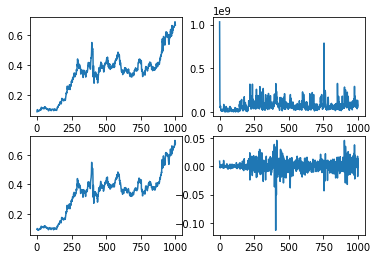

In [104]:
fig = plt.figure()

fig, axes= plt.subplots(2,2) # axes는 Axes객체의 2x2의 배열 axes[0][0].plot([1,2,3]) axes[1][0].plot([4,5,4,5])
axes[0][0].plot(data_O) 
axes[1][1].plot(data_lo) 
axes[1][0].plot(data_C)
axes[0][1].plot(data_V)

#plt.subplot(2,2,1)
#plt.plot(_df["Open"])이런식으로 네개 뽑을 수 있음


In [ ]:
result 